In [4]:
import math
PI = math.pi
import numpy as np
traj = [
    [PI*0.0,PI*0.3,7.318-7.318],
    [PI*0.1,PI*0.35,7.894-7.318],
    [PI*0.2,PI*0.55,9.085-7.318],
    [PI*0.12,PI*0.5,09.787-7.318],
    [PI*0.0,PI*0.3,10.360-7.318],
]
traj = np.array(traj)


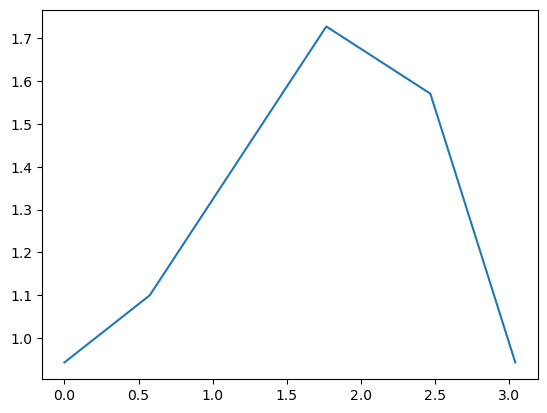

In [5]:
import matplotlib.pyplot as plt
plt.plot(traj[:,2],traj[:,1])

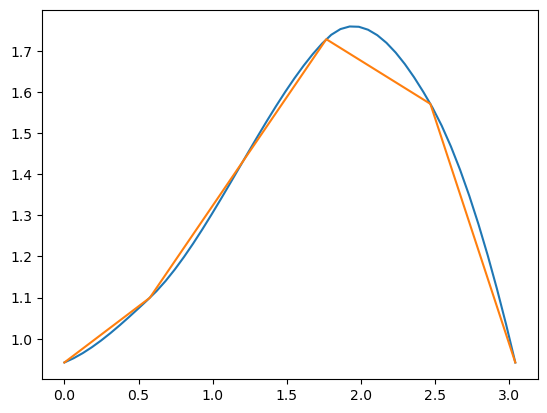

In [6]:
from scipy import interpolate

f0 = np.vectorize(interpolate.Akima1DInterpolator(traj[:,2],traj[:,0]))
f1 = np.vectorize(interpolate.Akima1DInterpolator(traj[:,2],traj[:,1]))


plt.plot(np.linspace(traj[0,2],traj[-1,2]),f1(np.linspace(traj[0,2],traj[-1,2])))
plt.plot(traj[:,2],traj[:,1])

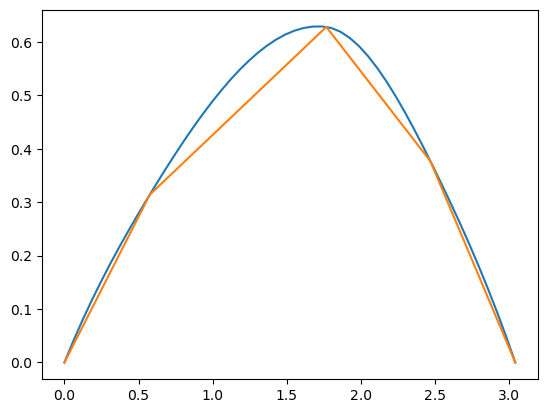

In [7]:
plt.plot(np.linspace(traj[0,2],traj[-1,2]),f0(np.linspace(traj[0,2],traj[-1,2])))
plt.plot(traj[:,2],traj[:,0])

(2, 50)


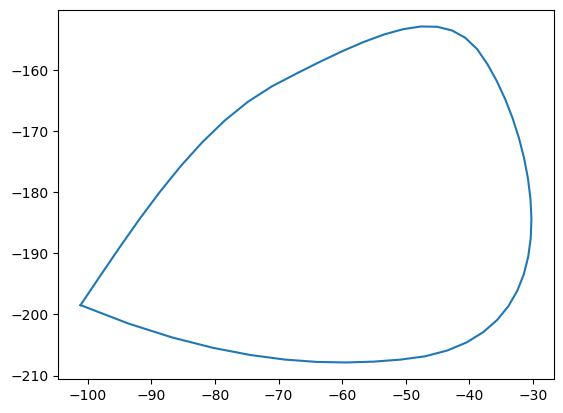

In [8]:
def point_scal(th1,th2):
    x = 125*math.sin(th1)-125*math.sin(th2-th1)
    y = 125*math.cos(th1)+125*math.cos(th2-th1)
    return x,y
point = np.vectorize(point_scal)
points = np.array(point(f0(np.linspace(traj[0,2],traj[-1,2])),f1(np.linspace(traj[0,2],traj[-1,2]))))
print(points.shape)
plt.plot(points[0],-points[1])

In [10]:
point([0,1],[1,2])

(array([-105.1838731,    0.       ]), array([192.53778823, 135.07557647]))

In [60]:
import math
PI = math.pi
import numpy as np
import matplotlib.pyplot as plt
t = 0.1
traj = [
    [94.67,124.18],
    [104.05,116.8],
    [111.96,112.1],
    [120.1,108.71],
    [127.32,108.46],
    [131.45,103.6],
    [135.33,94.62],
    [138.93,87.26],
    [140.74,83.2],
    [138.79,82.42],
    [134.69,85.74],
    [131.99,88.08],
    [127.09,91.92],
    [124.12,94.16],
    [119.2,97.92],
    [118.29,98.51],
    [115.44,99.83],
    [111.65,101.14],
    [109.18,101.74],
    [106.12,102.08],
    [102.93,102.35],
    [95.58,106.04],
    [91.46,125.68],
    [94.67,124.18],
]
traj = np.array(traj)
traj = np.vectorize(np.deg2rad)(traj)
#2軸の角度変化のうち大きい方を基準角速度で割って、基準補完時間とすればいいかな

std_omega = 40*(2*PI/60)*(26/70)

itpl_times = [0]
for i in range(1,traj.shape[0]):
    t1=traj[i]
    t2=traj[(i+1)%traj.shape[0]]
    itpl_time = max(np.abs(t2-t1))/std_omega
    itpl_times.append(itpl_time+itpl_times[-1])

traj2 = np.hstack((traj,np.array(itpl_times[1:]).reshape((traj.shape[0],1))))


In [61]:
print(traj2[:,2])

[0.10522436 0.19395833 0.28527244 0.36626603 0.42078526 0.52152244
 0.60408654 0.64963141 0.67150641 0.7175     0.74778846 0.80275641
 0.83607372 0.89126603 0.90147436 0.93344551 0.97596154 1.00366987
 1.03799679 1.07378205 1.15623397 1.37655449 1.4125641  1.4125641 ]


In [62]:
from scipy import interpolate

f0 = np.vectorize(interpolate.Akima1DInterpolator(traj2[:,2],traj2[:,0]))
f1 = np.vectorize(interpolate.Akima1DInterpolator(traj2[:,2],traj2[:,1]))


plt.plot(np.linspace(traj2[0,2],traj2[-1,2]),f1(np.linspace(traj2[0,2],traj2[-1,2])))
plt.plot(traj2[:,2],traj2[:,0])
print(traj2[:,2])


ValueError: `x` must be strictly increasing sequence.

(2, 24)


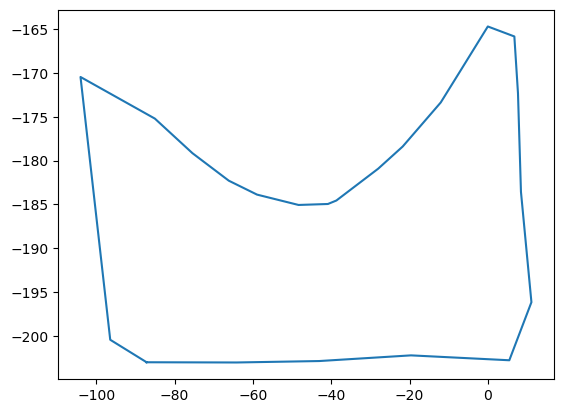

In [63]:
def point_scal(th1,th2):
    x = -125*math.cos(th1)-125*math.cos(th2+th1-PI)
    y = 125*math.sin(th1)+125*math.sin(th2+th1-PI)
    return x,y
point = np.vectorize(point_scal)
points = np.array(point(traj2[:,0],traj[:,1]))
print(points.shape)
plt.plot(points[0],-points[1])

In [65]:
f0 = np.vectorize(interpolate.Akima1DInterpolator(traj2[:,2],traj2[:,0]))
f1 = np.vectorize(interpolate.Akima1DInterpolator(traj2[:,2],traj2[:,1]))
timeline = np.linspace(traj2[0,2],traj2[-1,2],2000)
points_smooth = np.array(point(f0(timeline),f1(timeline)))
print(points_smooth.shape)
plt.plot(points_smooth[0],-points_smooth[1])

ValueError: `x` must be strictly increasing sequence.

↑これで多分いいと思う